This script conducts comprehensive analysis on six datasets retrieved from "Extension_Plan.ipynb". It addresses four specific research questions by utilizing visualizations and statistical analysis. Before delving into the analysis, the code executes necessary data cleaning procedures to ensure the datasets are prepared for thorough analysis.

In [1]:
# Importing necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
# Reading smoke estimate data from a CSV file into a pandas DataFrame
smoke_estimate_file_path = '../intermediate data/annual_smoke_estimate.csv'
smoke_estimate_df = pd.read_csv(smoke_estimate_file_path)

In [3]:
# Reading respiratory disease mortality data and filtering for Tulare County (FIPS code 6107)
resp_disease_data_file_path = '../data/IHME_USA_COUNTY_RESP_DISEASE_MORTALITY_1980_2014_CALIFORNIA_Y2017M09D26.csv'
resp_disease_df = pd.read_csv(resp_disease_data_file_path)
resp_disease_filtered_df = resp_disease_df[resp_disease_df['FIPS'] == 6107]
resp_disease_filtered_df = resp_disease_filtered_df.drop(['lower', 'upper', 'measure_id'], axis=1)

In [4]:
# Reading asthma hospitalization data and filtering for Tulare County
asthma_hospitalization_file_path = '../data/Asthma_Hospitalization_Rates_For_California_Counties_from_2015_to_2020.csv'
asthma_hospitalization_df = pd.read_csv(asthma_hospitalization_file_path)
asthma_hospitalization_filtered_df = asthma_hospitalization_df[asthma_hospitalization_df['COUNTY'] == 'Tulare']

In [5]:
# Reading various segmented respiratory disease data for different genders and diseases
resp_disease_male_asthma_df = pd.read_csv('../intermediate data/resp_disease_male_asthma.csv')
resp_disease_male_copd_df = pd.read_csv('../intermediate data/resp_disease_male_copd.csv')

resp_disease_female_asthma_df = pd.read_csv('../intermediate data/resp_disease_female_asthma.csv')
resp_disease_female_copd_df = pd.read_csv('../intermediate data/resp_disease_female_copd.csv')

resp_disease_both_asthma_df = pd.read_csv('../intermediate data/resp_disease_both_asthma.csv')
resp_disease_both_copd_df = pd.read_csv('../intermediate data/resp_disease_both_copd.csv')

# Research Question 1

**To what extent do certain respiratory diseases linked to smoke-related pollution (e.g., Chronic respiratory diseases, Chronic obstructive pulmonary disease, Asthma) exhibit higher mortality rates compared to diseases not directly related to smoke-related pollution (e.g., Pneumoconiosis, Coal workers pneumoconiosis) in Tulare County from 1980 to 2014?**

To address this research question, we'll compare the average mortality rates between smoke-related and non-smoke-related cases. We'll analyze which category exhibits a higher average mortality rate and quantify the difference. Crucially, we'll assess whether the observed disparity is substantial enough to demand attention.

In [6]:
# Defining lists for smoke-related and non-smoke-related diseases
smoke_related_diseases = ['Chronic obstructive pulmonary disease', 'Asthma']
non_smoke_related_diseases = ['Pneumoconiosis', 'Silicosis', 'Asbestosis', 'Other pneumoconiosis', 'Interstitial lung disease and pulmonary sarcoidosis', 'Other chronic respiratory diseases', 'Coal workers pneumoconiosis']

# Filtering the DataFrame for 'Both' sexes
both_sex_df = resp_disease_filtered_df[resp_disease_filtered_df['sex'] == 'Both']

# Filtering the DataFrame for smoke-related and non-smoke-related diseases
smoke_related_df = both_sex_df[both_sex_df['cause_name'].isin(smoke_related_diseases)]
non_smoke_related_df = both_sex_df[both_sex_df['cause_name'].isin(non_smoke_related_diseases)]

# Calculating average age-standardized mortality rates for smoke-related and non-smoke-related diseases
average_smoke_related_mortality = smoke_related_df['mx'].mean()
average_non_smoke_related_mortality = non_smoke_related_df['mx'].mean()

# Calculating the ratio of average mortality rates between smoke-related and non-smoke-related diseases
times_difference = (average_smoke_related_mortality/average_non_smoke_related_mortality)

# Printing the average mortality rates and the ratio                    
print("Average Smoke-Related Mortality: ", average_smoke_related_mortality)
print("Average Non-smoke-Related Mortality: ", average_non_smoke_related_mortality)
print(f"Smoke-related diseases show {times_difference:.2f} times higher age-standardized mortality rate compared to non-smoke related diseases.")

Average Smoke-Related Mortality:  26.470297625995215
Average Non-smoke-Related Mortality:  0.881009981681082
Smoke-related diseases show 30.05 times higher age-standardized mortality rate compared to non-smoke related diseases.


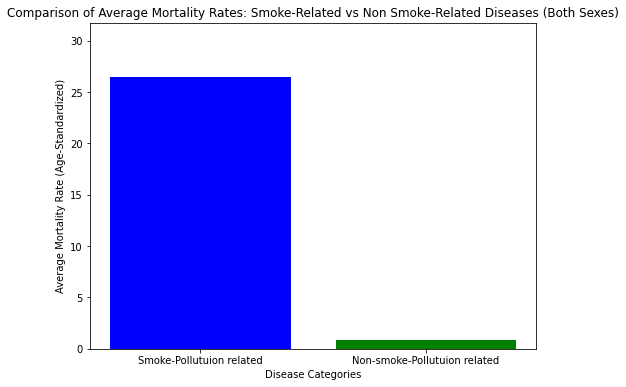

In [7]:
# We will generate a bar plot comparing the average age-standardized mortality rates between smoke-related
# and non-smoke-related diseases for Both sexes.
# The plot visualizes the difference in mortality rates between these disease categories.

# Calculate average age-standardized mortality rates for smoke-related and non-smoke-related diseases
average_smoke_related_mortality = smoke_related_df['mx'].mean()
average_non_smoke_related_mortality = non_smoke_related_df['mx'].mean()

# Plotting a bar chart to compare mortality rates between smoke-related and non-smoke-related diseases
disease_types = ['Smoke-Pollutuion related', 'Non-smoke-Pollutuion related']
average_mortalities = [average_smoke_related_mortality, average_non_smoke_related_mortality]
plt.figure(figsize=(8, 6))
plt.bar(disease_types, average_mortalities, color=['blue', 'green'])
plt.xlabel('Disease Categories')
plt.ylabel('Average Mortality Rate (Age-Standardized)')
plt.title('Comparison of Average Mortality Rates: Smoke-Related vs Non Smoke-Related Diseases (Both Sexes)')
plt.ylim(0, max(average_mortalities) * 1.2)
plt.show()

Considering the significantly elevated mortality rates linked to smoke-pollution related diseases and the anticipated rise in fire smoke, prioritizing attention becomes crucial. Based on findings from the "Analysis_Prediction_And_Visualization.ipynb" file, projecting an increase in fire smoke, our focus narrows down to analyzing "Asthma" and "Chronic obstructive pulmonary disease (COPD)" specifically in this investigation.

# Research Question 2
**How does fire smoke relate to the age-standardized mortality rate for respiratory diseases in Tulare County across different years?**

To address this inquiry, we aim to investigate the correlation between fire smoke estimates and the age-standardized mortality rate separately for asthma and COPD.

We'll start our examination by focusing on asthma.

In [8]:
# Merging the filtered dataframes on the common column 'Year'
tulare_both_asthma_merged_data = smoke_estimate_df.merge(resp_disease_both_asthma_df, left_on='Year', right_on='year_id')

In [9]:
# Displaying the initial rows of the merged data
tulare_both_asthma_merged_data.head()

,Year,Smoke_estimate,Mean_GIS_Acres,Mean_Distance,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx
0,1980,62.140512,895.172857,426.540949,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1980,Rate,3.009805
1,1981,61.731563,1330.339717,424.495357,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1981,Rate,2.891207
2,1982,41.906420,676.763958,457.093508,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1982,Rate,2.775184
3,1983,50.464965,1175.340815,457.405750,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1983,Rate,2.885619
4,1984,86.650552,1329.306783,446.997922,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1984,Rate,4.370964


In [10]:
# Regression analysis to examine the relationship between smoke exposure and age-standardized mortality rates
X = tulare_both_asthma_merged_data['Smoke_estimate']  # Independent variable (smoke exposure)
y = tulare_both_asthma_merged_data['mx']  # Dependent variable (age-standardized mortality rate)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     mx   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     9.688
Date:                Tue, 05 Dec 2023   Prob (F-statistic):            0.00382
Time:                        02:15:22   Log-Likelihood:                -34.709
No. Observations:                  35   AIC:                             73.42
Df Residuals:                      33   BIC:                             76.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2591      0.290      7.

In [11]:
# Calculating the correlation coefficient
correlation_both_asthma = tulare_both_asthma_merged_data['Smoke_estimate'].corr(tulare_both_asthma_merged_data['mx'])
print(f"Correlation coefficient: {correlation_both_asthma}")

Correlation coefficient: 0.4763939939528753


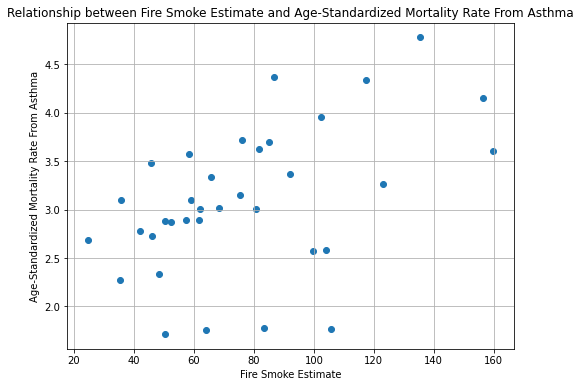

In [12]:
# Plotting smoke exposure against age-standardized mortality rate
plt.figure(figsize=(8, 6))
plt.scatter(tulare_both_asthma_merged_data['Smoke_estimate'], tulare_both_asthma_merged_data['mx'])
plt.title('Relationship between Fire Smoke Estimate and Age-Standardized Mortality Rate From Asthma')
plt.xlabel('Fire Smoke Estimate')
plt.ylabel('Age-Standardized Mortality Rate From Asthma')
plt.grid(True)
plt.show()

Based on the plot and results, a notable correlation of 0.4763 exists between the variables. The regression analysis suggests that a one-unit rise in fire smoke estimate corresponds to a 0.0108-unit increase in age-standardized mortality rate. The low p-value of 0.004 signifies a statistically significant relationship between fire smoke estimate and age-standardized mortality rate from asthma.

Now, let us look into the data for COPD.

In [13]:
# Merging the filtered dataframes on the common column 'Year'
tulare_both_copd_merged_data = smoke_estimate_df.merge(resp_disease_both_copd_df, left_on='Year', right_on='year_id')

In [14]:
# Displaying the initial rows of the merged data
tulare_both_copd_merged_data.head()

,Year,Smoke_estimate,Mean_GIS_Acres,Mean_Distance,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx
0,1980,62.140512,895.172857,426.540949,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1980,Rate,2.980534
1,1981,61.731563,1330.339717,424.495357,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1981,Rate,2.870040
2,1982,41.906420,676.763958,457.093508,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1982,Rate,2.830826
3,1983,50.464965,1175.340815,457.405750,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1983,Rate,2.800459
4,1984,86.650552,1329.306783,446.997922,Deaths,804,Tulare County,6107,515,Asthma,3,Both,27,Age-standardized,1984,Rate,2.863339


In [15]:
# Regression analysis to examine the relationship between smoke exposure and age-standardized mortality rates
X = tulare_both_copd_merged_data['Smoke_estimate']  # Independent variable (smoke exposure)
y = tulare_both_copd_merged_data['mx']  # Dependent variable (age-standardized mortality rate)
X = sm.add_constant(X)  # Adding a constant for the intercept term
model = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     mx   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                   0.09477
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.760
Time:                        02:15:22   Log-Likelihood:                -26.649
No. Observations:                  35   AIC:                             57.30
Df Residuals:                      33   BIC:                             60.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7009      0.230     11.

In [16]:
# Calculating the correlation coefficient
correlation_both_copd = tulare_both_copd_merged_data['Smoke_estimate'].corr(tulare_both_copd_merged_data['mx'])
print(f"Correlation coefficient: {correlation_both_copd}")

Correlation coefficient: -0.05351313930385858


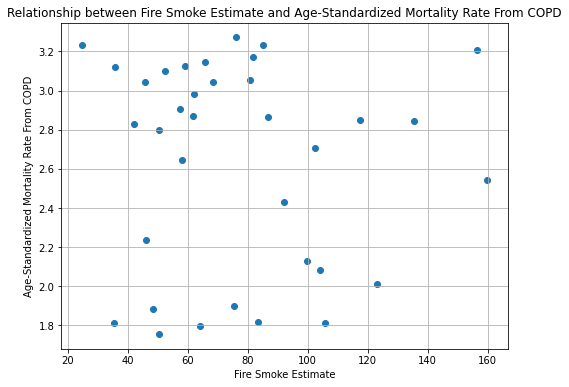

In [17]:
# Plotting smoke exposure against age-standardized mortality rate
plt.figure(figsize=(8, 6))
plt.scatter(tulare_both_copd_merged_data['Smoke_estimate'], tulare_both_copd_merged_data['mx'])
plt.title('Relationship between Fire Smoke Estimate and Age-Standardized Mortality Rate From COPD')
plt.xlabel('Fire Smoke Estimate')
plt.ylabel('Age-Standardized Mortality Rate From COPD')
plt.grid(True)
plt.show()

After analyzing the plot and results, a minor correlation of -0.05351 is evident between the variables. The regression analysis indicates that for every unit increase in fire smoke estimate, there is a decrease of 0.0008 units in age-standardized mortality rate. However, the notably high p-value of 0.760 signifies the lack of statistical significance in the relationship between fire smoke estimate and age-standardized mortality rate from COPD. Consequently, our subsequent analyses will exclusively concentrate on asthma due to its higher relevance.

# Research Question 3
**Is there a noticeable difference in respiratory disease mortality rates between sexes due to variations in exposure to fire smoke in Tulare County?**

To comprehensively address this query, we'll examine data specific to male and female asthma cases separately. Our initial focus will be on males with asthma.

In [18]:
# Merging the filtered dataframes on the common column 'Year'
tulare_male_asthma_merged_data = smoke_estimate_df.merge(resp_disease_male_asthma_df, left_on='Year', right_on='year_id')

In [19]:
# Displaying the initial rows of the merged data
tulare_male_asthma_merged_data.head()

,Year,Smoke_estimate,Mean_GIS_Acres,Mean_Distance,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx
0,1980,62.140512,895.172857,426.540949,Deaths,804,Tulare County,6107,515,Asthma,1,Male,27,Age-standardized,1980,Rate,3.127969
1,1981,61.731563,1330.339717,424.495357,Deaths,804,Tulare County,6107,515,Asthma,1,Male,27,Age-standardized,1981,Rate,2.939697
2,1982,41.906420,676.763958,457.093508,Deaths,804,Tulare County,6107,515,Asthma,1,Male,27,Age-standardized,1982,Rate,2.745092
3,1983,50.464965,1175.340815,457.405750,Deaths,804,Tulare County,6107,515,Asthma,1,Male,27,Age-standardized,1983,Rate,2.899349
4,1984,86.650552,1329.306783,446.997922,Deaths,804,Tulare County,6107,515,Asthma,1,Male,27,Age-standardized,1984,Rate,4.815881


In [20]:
# Regression analysis to examine the relationship between smoke exposure and age-standardized mortality rates
X = tulare_male_asthma_merged_data['Smoke_estimate']  # Independent variable (smoke exposure)
y = tulare_male_asthma_merged_data['mx']  # Dependent variable (age-standardized mortality rate)
X = sm.add_constant(X)  # Adding a constant for the intercept term
model = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     mx   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     12.61
Date:                Tue, 05 Dec 2023   Prob (F-statistic):            0.00118
Time:                        02:15:23   Log-Likelihood:                -41.824
No. Observations:                  35   AIC:                             87.65
Df Residuals:                      33   BIC:                             90.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9981      0.355      5.

In [21]:
# Calculating the correlation coefficient
correlation_male_asthma = tulare_male_asthma_merged_data['Smoke_estimate'].corr(tulare_male_asthma_merged_data['mx'])
print(f"Correlation coefficient: {correlation_male_asthma}")

Correlation coefficient: 0.5257343862513975


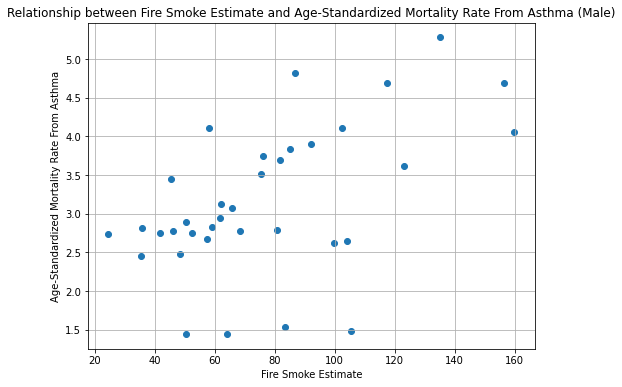

In [22]:
# Plotting smoke exposure against age-standardized mortality rate from asthma in males
plt.figure(figsize=(8, 6))
plt.scatter(tulare_male_asthma_merged_data['Smoke_estimate'], tulare_male_asthma_merged_data['mx'])
plt.title('Relationship between Fire Smoke Estimate and Age-Standardized Mortality Rate From Asthma (Male)')
plt.xlabel('Fire Smoke Estimate')
plt.ylabel('Age-Standardized Mortality Rate From Asthma')
plt.grid(True)
plt.show()

Based on the plot and results, a notable correlation of 0.5257 exists between the variables. The regression analysis suggests that a one-unit rise in fire smoke estimate corresponds to a 0.0151-unit increase in age-standardized mortality rate from asthma in males. The low p-value of 0.001 signifies a statistically significant relationship between fire smoke estimate and age-standardized mortality rate from asthma in males.

Next, we will do the same analysis for females.

In [23]:
# Merging the filtered dataframes on the common column 'Year'
tulare_female_asthma_merged_data = smoke_estimate_df.merge(resp_disease_female_asthma_df, left_on='Year', right_on='year_id')

In [24]:
# Displaying the initial rows of the merged data
tulare_female_asthma_merged_data.head()

,Year,Smoke_estimate,Mean_GIS_Acres,Mean_Distance,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx
0,1980,62.140512,895.172857,426.540949,Deaths,804,Tulare County,6107,515,Asthma,2,Female,27,Age-standardized,1980,Rate,2.891642
1,1981,61.731563,1330.339717,424.495357,Deaths,804,Tulare County,6107,515,Asthma,2,Female,27,Age-standardized,1981,Rate,2.842717
2,1982,41.906420,676.763958,457.093508,Deaths,804,Tulare County,6107,515,Asthma,2,Female,27,Age-standardized,1982,Rate,2.805276
3,1983,50.464965,1175.340815,457.405750,Deaths,804,Tulare County,6107,515,Asthma,2,Female,27,Age-standardized,1983,Rate,2.871889
4,1984,86.650552,1329.306783,446.997922,Deaths,804,Tulare County,6107,515,Asthma,2,Female,27,Age-standardized,1984,Rate,3.926048


In [25]:
# Regression analysis to examine the relationship between smoke exposure and age-standardized mortality rates
X = tulare_female_asthma_merged_data['Smoke_estimate']  # Independent variable (smoke exposure)
y = tulare_female_asthma_merged_data['mx']  # Dependent variable (age-standardized mortality rate)
X = sm.add_constant(X)  # Adding a constant for the intercept term
model = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     mx   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     4.705
Date:                Tue, 05 Dec 2023   Prob (F-statistic):             0.0374
Time:                        02:15:23   Log-Likelihood:                -29.632
No. Observations:                  35   AIC:                             63.26
Df Residuals:                      33   BIC:                             66.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5213      0.251     10.

In [26]:
# Calculating the correlation coefficient
correlation_female_asthma = tulare_female_asthma_merged_data['Smoke_estimate'].corr(tulare_female_asthma_merged_data['mx'])
print(f"Correlation coefficient: {correlation_female_asthma}")

Correlation coefficient: 0.3532502956838417


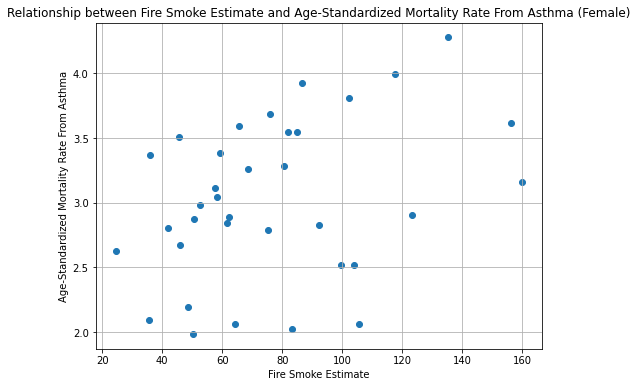

In [27]:
# Plotting smoke exposure against age-standardized mortality rate from asthma in males
plt.figure(figsize=(8, 6))
plt.scatter(tulare_female_asthma_merged_data['Smoke_estimate'], tulare_female_asthma_merged_data['mx'])
plt.title('Relationship between Fire Smoke Estimate and Age-Standardized Mortality Rate From Asthma (Female)')
plt.xlabel('Fire Smoke Estimate')
plt.ylabel('Age-Standardized Mortality Rate From Asthma')
plt.grid(True)
plt.show()

Based on the plot and results, a notable correlation of 0.3533 exists between the variables. The regression analysis suggests that a one-unit rise in fire smoke estimate corresponds to a 0.0065-unit increase in age-standardized mortality rate from asthma in females. The low p-value of 0.037 signifies a statistically significant relationship between fire smoke estimate and age-standardized mortality rate from asthma in females.

We aim to analyze the crests and troughs in asthma-related mortality rates for both male and female populations. We'll examine if notable spikes in mortality rates occur following major wildfires. To achieve this, we'll create a time series plot displaying the trends in male and female asthma mortality rates spanning from 1980 to 2014. Additionally, we'll overlay significant events such as wildfires or the establishment of fire departments onto these time series plots to assess their potential impact on the trends.

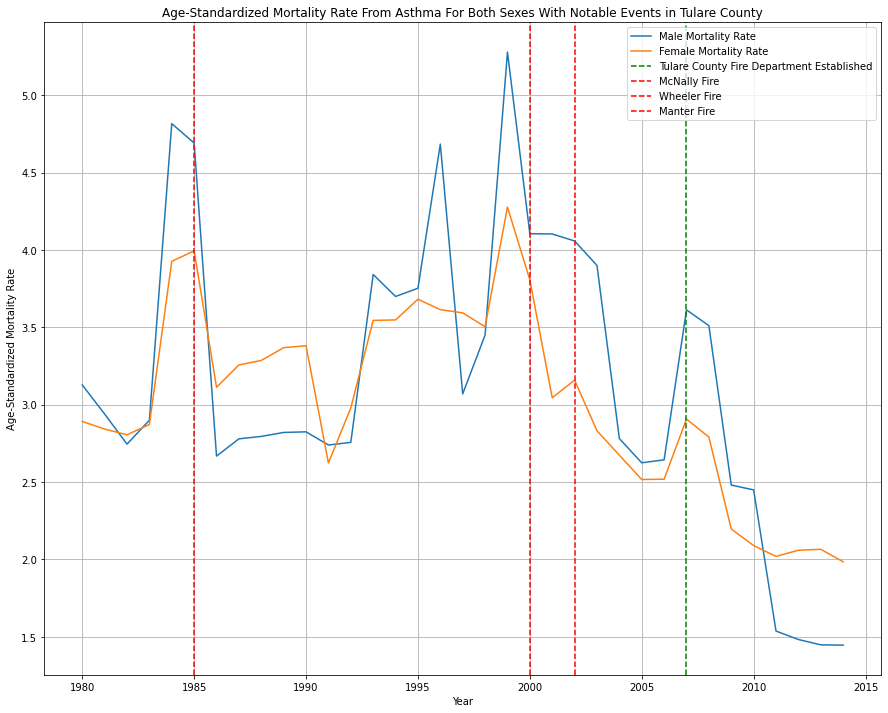

In [28]:
# Plotting age-standardized mortality rates for males and females with asthma in Tulare County
plt.figure(figsize=(15, 12))
plt.plot(tulare_male_asthma_merged_data['Year'], tulare_male_asthma_merged_data['mx'], label="Male Mortality Rate")
plt.plot(tulare_female_asthma_merged_data['Year'], tulare_female_asthma_merged_data['mx'], label="Female Mortality Rate")
plt.title('Age-Standardized Mortality Rate From Asthma For Both Sexes With Notable Events in Tulare County')
plt.xlabel('Year')
plt.ylabel('Age-Standardized Mortality Rate')
plt.grid(True)
plt.legend()

# Adding vertical lines for notable events
plt.axvline(x=2007, color='green', linestyle='--', label='Tulare County Fire Department Established')
plt.axvline(x=2002, color='red', linestyle='--', label='McNally Fire')
plt.axvline(x=1985, color='red', linestyle='--', label='Wheeler Fire')
plt.axvline(x=2000, color='red', linestyle='--', label='Manter Fire')

plt.legend()
plt.show()

The blue and orange lines represent mortality rates for males and females, respectively. Both exhibit nearly identical peaks and dips. The red dotted lines correspond to significant fire incidents in Tulare, coinciding with spikes in mortality rates for both genders. Notably, the green dotted line signifies the year when the Tulare fire department was established, followed by a consistent decline in mortality rates for both male and female populations thereafter. This decline might be attributed to various factors, including improved emergency response, enhanced public awareness, and perhaps advancements in healthcare accessibility and preventive measures implemented by the fire department.

Before providing a definitive answer to the research question on Asthma mortality rates' impact on genders, we'll explore two aspects:

1) Visualizing the contrast in mean asthma mortality rates between males and females through a bar plot

2) Conducting a statistical test to assess the significance of the observed difference in mortality rates between genders

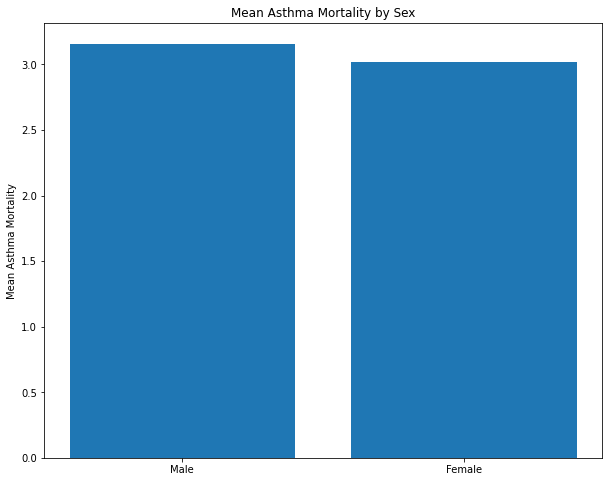

In [29]:
# Bar plot representing mean respiratory disease mortality by sex
plt.figure(figsize=(10, 8))
plt.bar(['Male', 'Female'], [tulare_male_asthma_merged_data['mx'].mean(), tulare_female_asthma_merged_data['mx'].mean()])
plt.title('Mean Asthma Mortality by Sex')
plt.ylabel('Mean Asthma Mortality')
plt.show()

In [30]:
# Perform t-test for the difference in means between sexes for asthma mortality
t_statistic_asthma, p_value_asthma = stats.ttest_ind(tulare_male_asthma_merged_data['mx'], tulare_female_asthma_merged_data['mx'])
print(f"T-Statistic: {t_statistic_asthma}, P-Value: {p_value_asthma}")

T-Statistic: 0.7151833896425388, P-Value: 0.4769441416148842


The plot illustrates comparable mean asthma mortality rates between males and females, further supported by the conducted t-test. The obtained results, showcasing a t-statistic value of 0.7152 and a p-value of 0.4769, suggest insufficient evidence to claim a significant disparity in smoke-related deaths between genders concerning asthma.

# Research Question 4
**How does the prevalence of smoke fires in Tulare County connect with rates of asthma-related hospitalizations across different age groups over time?**

To answer this question we would look into the asthma hospitalization data from [CalHSS](https://www.chhs.ca.gov/). However, before we proceed with the analysis, we need to do some form of pre-processing to have the data cleaned and ready for use.

In [31]:
# For data preparation and cleaning we perform the following operations:
# 1. Dropping unnecessary columns like 'COMMENT', '_id', and 'AGE GROUP'
# 2. Handling 'inf' values, replacing them with NaN, converting the 'NUMBER OF HOSPITALIZATIONS' column to numeric format, and coercing errors to NaN
# 3. Converting 'NUMBER OF HOSPITALIZATIONS' to integer format
# 4. Filtering the dataframe to focus on 'All ages'

asthma_hospitalization_filtered_df = asthma_hospitalization_filtered_df.drop(['COMMENT', '_id', 'AGE GROUP'], axis=1)
asthma_hospitalization_filtered_df['NUMBER OF HOSPITALIZATIONS'] = asthma_hospitalization_filtered_df['NUMBER OF HOSPITALIZATIONS'].replace('inf', np.nan)
asthma_hospitalization_filtered_df['NUMBER OF HOSPITALIZATIONS'] = pd.to_numeric(asthma_hospitalization_filtered_df['NUMBER OF HOSPITALIZATIONS'], errors='coerce')
asthma_hospitalization_filtered_df['NUMBER OF HOSPITALIZATIONS'] = asthma_hospitalization_filtered_df['NUMBER OF HOSPITALIZATIONS'].astype('Int64')
all_ages_df = asthma_hospitalization_filtered_df[asthma_hospitalization_filtered_df['STRATA NAME'] == 'All ages']

In [32]:
# Merging smoke estimate data with the filtered asthma hospitalization data based on the 'Year' column.
merged_df = smoke_estimate_df.merge(all_ages_df, left_on='Year', right_on='YEAR')

In [33]:
# Display the rows of the merged dataframe
merged_df

,Year,Smoke_estimate,Mean_GIS_Acres,Mean_Distance,COUNTY,YEAR,STRATA,STRATA NAME,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE
0,2015,89.484706,2246.644818,633.018180,Tulare,2015,Total population,All ages,338,7.0
1,2016,73.908608,2053.977456,623.156929,Tulare,2016,Total population,All ages,224,4.5
2,2017,136.423352,3088.494101,555.797537,Tulare,2017,Total population,All ages,234,4.7
3,2018,98.099363,2690.521096,570.180984,Tulare,2018,Total population,All ages,190,3.7
4,2019,31.255530,865.234138,525.801426,Tulare,2019,Total population,All ages,210,4.2
5,2020,173.532934,2553.348649,550.070381,Tulare,2020,Total population,All ages,77,1.5


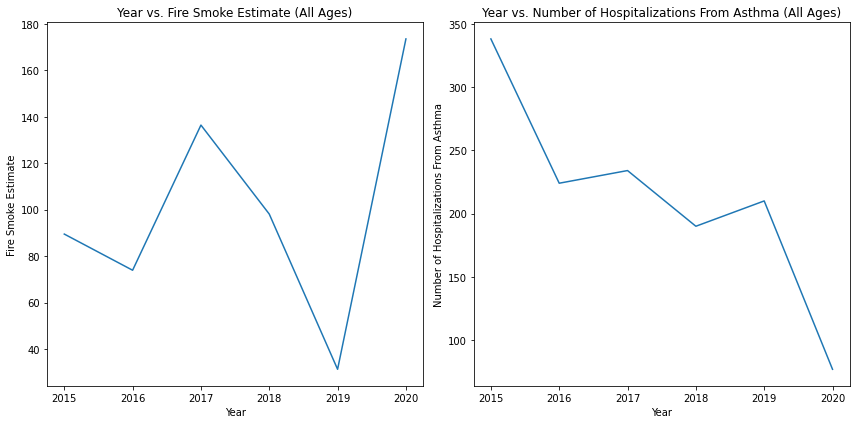

In [34]:
# Creating two subplots to visualize trends: Year vs. Smoke Estimate and Year vs. Number of Hospitalizations
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Year vs. Smoke Estimate
axs[0].plot(merged_df['Year'], merged_df['Smoke_estimate'])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Fire Smoke Estimate')
axs[0].set_title('Year vs. Fire Smoke Estimate (All Ages)')

# Plot 2: Year vs. Number of Hospitalizations
axs[1].plot(merged_df['Year'], merged_df['NUMBER OF HOSPITALIZATIONS'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Hospitalizations From Asthma')
axs[1].set_title('Year vs. Number of Hospitalizations From Asthma (All Ages)')

plt.tight_layout()
plt.show()

The showcased trends in the data, covering the period from 2015 to 2020, offer a snapshot rather than a comprehensive view of the entire scenario. Across these years, noticeable fluctuations in fire smoke estimates are evident, depicting varying levels of smoke exposure. However, amidst these fluctuations, a promising trend emerges: despite periodic rises in fire smoke estimates, there exists a consistent downtrend in asthma-related hospitalizations. This decline in hospitalizations might be attributed to several potential factors, including heightened public awareness regarding smoke exposure, or advancements in healthcare interventions aimed at managing respiratory conditions.

Now let us delve deeper into the nuanced impact of asthma across different age groups

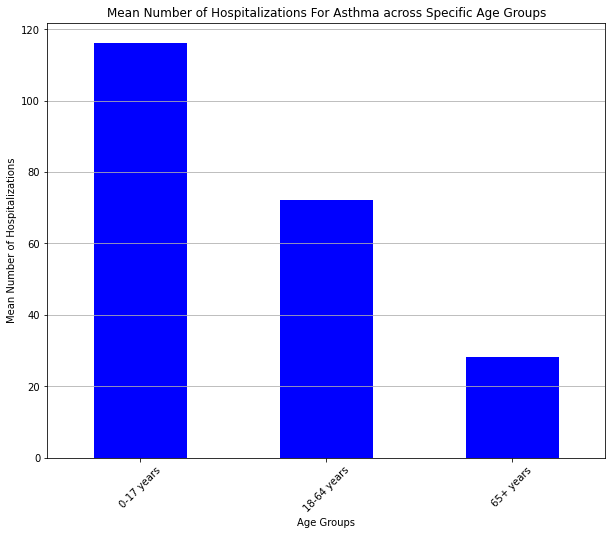

In [36]:
# Replacing inconsistent age group names with standardized ones
asthma_hospitalization_filtered_df['STRATA NAME'] = asthma_hospitalization_filtered_df['STRATA NAME'].replace({
    '017 years': '0-17 years',
    '65+ years': '65+ years',
    '1864 years': '18-64 years'
})

# Filtering the dataframe for specific age groups: 0-17 years, 65+ years, 18-64 years
specific_age_groups = ['0-17 years', '65+ years', '18-64 years']
specific_age_df = asthma_hospitalization_filtered_df[asthma_hospitalization_filtered_df['STRATA NAME'].isin(specific_age_groups)]

# Grouping by 'STRATA NAME' and calculating the mean hospitalizations for each age group
mean_hospitalizations = specific_age_df.groupby('STRATA NAME')['NUMBER OF HOSPITALIZATIONS'].mean()

# Plotting the mean hospitalizations for specific age groups as a bar chart
plt.figure(figsize=(10, 8))
mean_hospitalizations.plot(kind='bar', color='blue')
plt.xlabel('Age Groups')
plt.ylabel('Mean Number of Hospitalizations')
plt.title('Mean Number of Hospitalizations For Asthma across Specific Age Groups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The plot demonstrates distinct trends in hospitalizations among age groups. Notably, the 0-17 years age bracket exhibits markedly higher mean hospitalizations, approximately 2 to 4 times greater than those of the 18-64 and 65+ years groups. Specifically, hospitalizations for the 0-17 years group are nearly fourfold higher compared to the 65+ years group. Additionally, the 18-64 years age range indicates a susceptibility around 2.5 times greater than the 65+ years category.